In [7]:
import pandas as pd                                          #Load data & perform basic operations
import numpy as np                                           #Numpy Arrays
import matplotlib.pyplot as plt                              #Matplotlib is a low level graph plotting library in python that serves as a visualization utility.
import seaborn as sns                                        #Seaborn is a library that uses Matplotlib underneath to plot graphs. It will be used to visualize random distributions.
from sklearn.model_selection import train_test_split         #Use to split the original data into training data & test data
from sklearn.ensemble import RandomForestRegressor           #Import Random Forest Regression Model
from sklearn import metrics

In [8]:
kurs = pd.read_excel('new.xlsx')
kurs

,Tanggal,KursAUD,KursMYR,KursEURO
0,2023-01-02,10625.80,3560.55,16694.78
1,2023-01-03,10651.29,3556.79,16717.18
2,2023-01-04,10632.27,3562.52,16651.90
3,2023-01-05,10735.64,3568.23,16626.82
4,2023-01-06,10689.84,3568.71,16646.59
...,...,...,...,...
109,2023-06-21,10291.94,3261.10,16542.07
110,2023-06-22,10190.52,3242.93,16431.61
111,2023-06-23,10185.97,3224.91,16488.85
112,2023-06-26,10094.38,3225.55,16390.37


In [66]:
correlation = kurs.corr(numeric_only=True)

<Axes: >

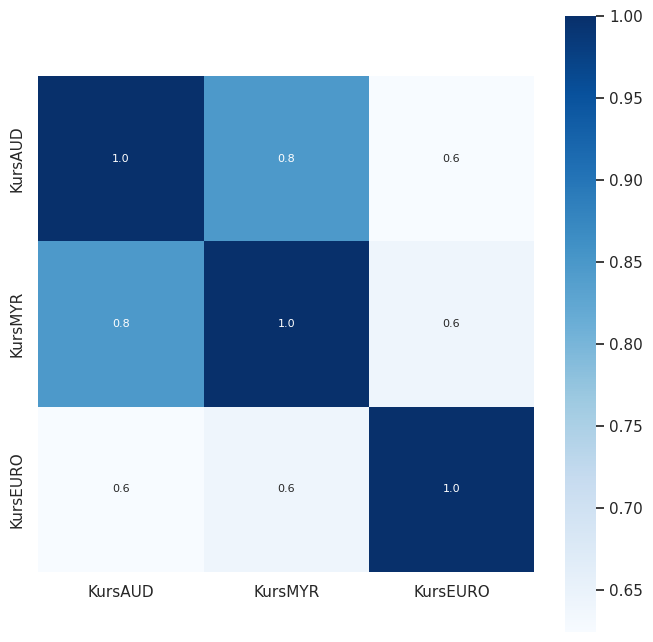

In [67]:
plt.figure(figsize = (8, 8))
sns.heatmap(correlation, cbar=True, square=True, fmt=".1f", annot=True, annot_kws={'size' : 8}, cmap="Blues")

<Axes: xlabel='KursAUD', ylabel='Count'>

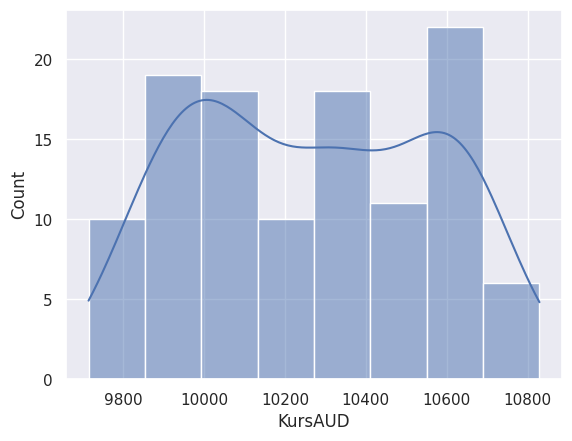

In [56]:
sns.set_theme()
sns.histplot(kurs["KursAUD"], kde=True)

In [20]:
X = kurs.drop(['Tanggal','KursAUD'],axis=1)
Y = kurs['KursAUD']
print(X)

     KursMYR  KursEURO
0    3560.55  16694.78
1    3556.79  16717.18
2    3562.52  16651.90
3    3568.23  16626.82
4    3568.71  16646.59
..       ...       ...
109  3261.10  16542.07
110  3242.93  16431.61
111  3224.91  16488.85
112  3225.55  16390.37
113  3231.57  16458.72

[114 rows x 2 columns]


In [21]:
print(Y)

0      10625.80
1      10651.29
2      10632.27
3      10735.64
4      10689.84
         ...   
109    10291.94
110    10190.52
111    10185.97
112    10094.38
113    10081.51
Name: KursAUD, Length: 114, dtype: float64


In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [23]:
regressor = RandomForestRegressor(n_estimators=100)

In [24]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [25]:
test_data_prediction = regressor.predict(X_test)

In [26]:
print(test_data_prediction)

[10638.568  10618.4832 10594.0599 10676.766  10294.3623 10232.4697
 10388.2251  9936.2912 10568.7872 10390.5972 10103.7933  9940.0408
 10183.846   9970.4495 10602.3321 10564.3998 10213.6444 10570.1873
 10564.2845 10580.1018 10558.8561 10692.5814 10683.5788]


In [64]:
print('MAPE: {:.2f}%'.format(np.mean(np.abs((Y_test - test_data_prediction) / test_data_prediction)) * 100))
print('MSE: {0:.3f}'.format(metrics.mean_squared_error(Y_test, test_data_prediction)))
print('MAE: {0:.3f}'.format(metrics.mean_absolute_error(Y_test, test_data_prediction)))
print('R^2: {0:.3f}'.format(metrics.r2_score(Y_test, test_data_prediction)))

MAPE: 0.55%
MSE: 5983.788
MAE: 57.788
R^2: 0.894


In [28]:
Y_test = list(Y_test)

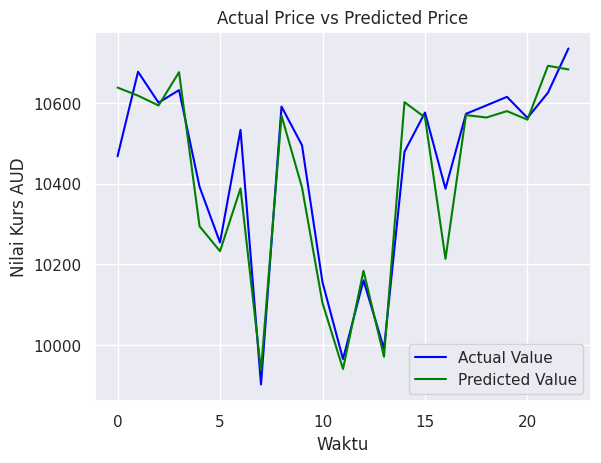

In [55]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Hari')
plt.ylabel('Nilai Kurs AUD')
plt.legend()
plt.show()